In [20]:
import scipy.io
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt

from utils import ImageLoader, plot_dataset_spiral

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Micrometer Dataset


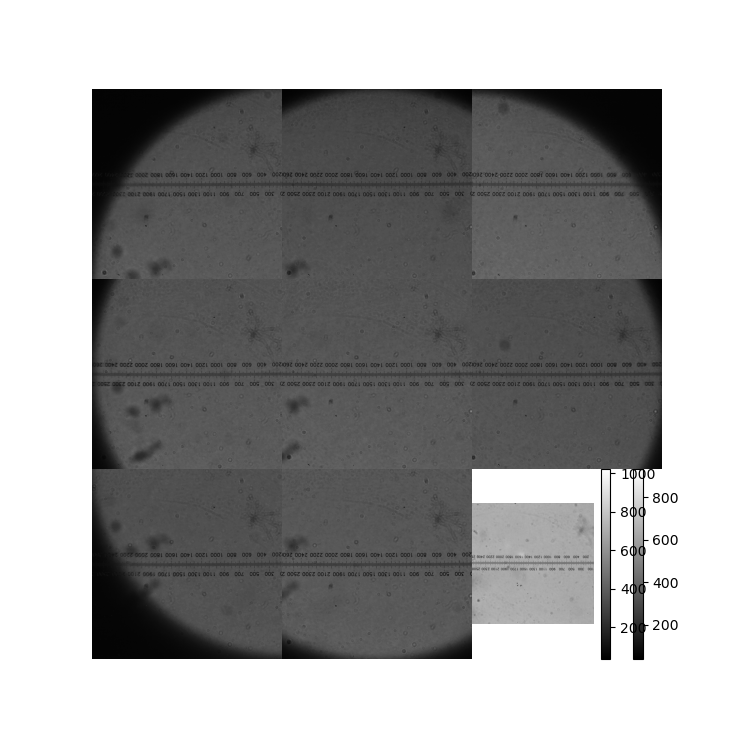

In [23]:
%matplotlib widget
plt.close()

# Chai Experiment Parameters
mag = 1.95
pixelSize = 4.8e-6/mag          # low-res pixel size of the camera sensor
NA = 0.10
upsampRatio = 4             # upsampling ratio

# =======================================================================

# 7x7 Dot Matrix

N = 49
LEDsize = 7            # size of the LED array (assumed to be odd)
LEDgap = 4.0              # distance between LED elements (in mm)
wavelength = 0.63e-6

# Malaria
# start = 1
# basePath = "../Dataset/7x7 Dot Matrix/Malaria"
# bitDepth = 10
# slideHeight = 1.06
# LEDheight = 78.92+slideHeight  # vertical distance between LED array and specimen (in mm)
# z=0

# Slanted Edge
# start = 0
# basePath = "../Dataset/7x7 Dot Matrix/Slanted Edge"
# # basePath = "../Dataset/Slanted Edge 10bit"
# bitDepth = 10
# slideHeight = 1.57
# LEDheight = 78.92+slideHeight  # vertical distance between LED array and specimen (in mm)
# z=0       # Defocus distance

# Micrometer 8bit
start = 1
# basePath = "../Dataset/7x7 Dot Matrix/Micrometer Dataset 8bit"
basePath = "../Dataset/7x7 Dot Matrix/Micrometer"
bitDepth = 10
slideHeight = 1.57
LEDheight = 78.92+slideHeight  # vertical distance between LED array and specimen (in mm)
z=0           # Defocus distance

# =======================================================================

# 7x7 Panel Matrix

# N = 49
# LEDsize = 7  # size of the LED array (assumed to be odd)
# LEDgap = 2.0  # distance between LED elements (in mm)
# Mag = 1.91

#  Malaria 
# bitDepth = 10
# slideHeight = 1.06
# LEDheight = 37.31+slideHeight  # vertical distance between LED array and specimen (in mm)

# R
# start = 7
# basePath = "../Dataset/7x7 Panel Matrix/Malaria/R"
# wavelength = 0.627e-6

# G
# start = 4
# basePath = "../Dataset/7x7 Panel Matrix/Malaria/G"
# wavelength = 0.523e-6

# B
# start = 4
# basePath = "../Dataset/7x7 Panel Matrix/Malaria/B"
# wavelength = 0.467e-6

# Squares
# start = 2
# basePath = "../Dataset/7x7 Panel Matrix/Squares"
# bitDepth = 10
# slideHeight = 1.57
# wavelength = 0.627e-6
# LEDheight = 37.04+slideHeight  # vertical distance between LED array and specimen (in mm)

# Micrometer
# start = 5
# basePath = "../Dataset/7x7 Panel Matrix/Micrometer"
# bitDepth = 10
# slideHeight = 1.57
# wavelength = 0.627e-6
# LEDheight = 37.04+slideHeight  # vertical distance between LED array and specimen (in mm)

# Slanted Edge
# start = 16
# basePath = "../Dataset/7x7 Panel Matrix/Slanted Edge 15x15"
# bitDepth = 10
# slideHeight = 1.57
# wavelength = 0.627e-6
# LEDheight = 38.05+slideHeight  # vertical distance between LED array and specimen (in mm)

# =======================================================================

# 15x15 Panel Matrix

# N = 225
# LEDsize = 15  # size of the LED array (assumed to be odd)
# LEDgap = 2.0  # distance between LED elements (in mm)
# Mag = 1.95

# Slanted Edge
# start = 4
# basePath = "../Dataset/15x15 Panel Matrix/Slanted Edge"
# bitDepth = 10
# slideHeight = 1.57
# wavelength = 0.627e-6
# LEDheight = 65.16+slideHeight  # vertical distance between LED array and specimen (in mm)

# Micrometer
# start = 4
# basePath = "../Dataset/15x15 Panel Matrix/Micrometer"
# bitDepth = 10
# slideHeight = 1.57
# wavelength = 0.627e-6
# LEDheight = 65.1+slideHeight  # vertical distance between LED array and specimen (in mm)

# Malaria
# N = 121
# LEDsize = 11  # size of the LED array (assumed to be odd)
# slideHeight = 1.28
# LEDheight = 65.15+slideHeight  # vertical distance between LED array and specimen (in mm)
# bitDepth = 10

# R 
# start = 1
# basePath = "../Dataset/15x15 Panel Matrix/Malaria/R"
# start = 3
# basePath = "../Dataset/15x15 Panel Matrix/Malaria (Misaligned)/R"
# wavelength = 0.627e-6

# G 
# start = 1
# basePath = "../Dataset/15x15 Panel Matrix/Malaria/G"
# start = 3
# basePath = "../Dataset/15x15 Panel Matrix/Malaria (Misaligned)/G"
# wavelength = 0.523e-6

# B
# start = 1
# basePath = "../Dataset/15x15 Panel Matrix/Malaria/B"
# start = 2
# basePath = "../Dataset/15x15 Panel Matrix/Malaria (Misaligned)/B"
# wavelength = 0.467e-6

# =======================================================================

# Generate filenames programmatically
imageFNs = [basePath + "/" +
            ('0'*(4-len(str(i+start))) + str(i+start) + '.tiff') for i in range(N)]

# Initialize image loader
Loader = ImageLoader(imageFNs[0], 1024)
# Loader = ImageLoader(imageFNs[0], 128)

# Square
# Loader = ImageLoader(imageFNs[0], 64, ROI=(550, 577))

sampleImg = Loader.load_image(imageFNs[0])

images = Loader.load_all_images(imageFNs)

plt.imshow(sampleImg, cmap='gray')
plt.colorbar()
plt.show()

# View Fourier Transforms


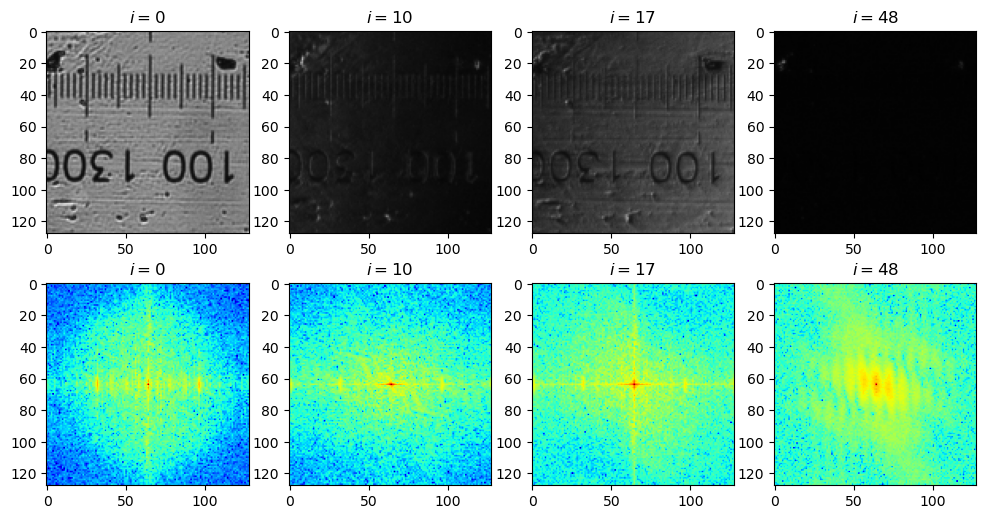

In [8]:
ids = [0, 10, 17, 48]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, n in enumerate(ids):
    axs[0, i].imshow(images[:, :, n], cmap="gray", vmin=0, vmax=255)
    axs[0, i].set_title(f"$i={n}$")

    axs[1, i].imshow(np.log(abs(fftshift(fft2(images[:, :, n])))), cmap="jet")
    axs[1, i].set_title(f"$i={n}$")

# View ROI


In [ ]:
%matplotlib widget

plt.close()
plt.imshow(sampleImg, cmap='gray')
plt.show()

# View Dataset Spiral


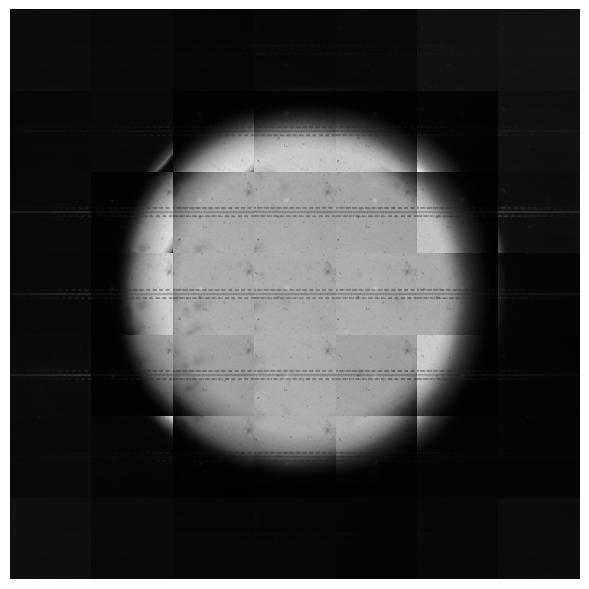

In [27]:
%matplotlib inline
plt.close()
# plot_dataset_spiral(images, 15, bitDepth="10bit")
plot_dataset_spiral(images, 7, bitDepth="scale",figsize=(7.35,7.4))

# plot_dataset_spiral(micrometerStack[::-1, ::-1], 7)     # mirrored
plt.savefig("Thesis Results/micrometerSpiral.png", dpi=200, bbox_inches="tight",pad_inches=0)

# Guoan Zheng Blood Smear Dataset


In [2]:
# Load the .mat file containing the MATLAB array
mat_data = scipy.io.loadmat("bloodsmear.mat")
# mat_data = scipy.io.loadmat('HE_red.mat')

mat_array = mat_data["imlow_HDR"]
bloodsmearStack = np.array(mat_array)

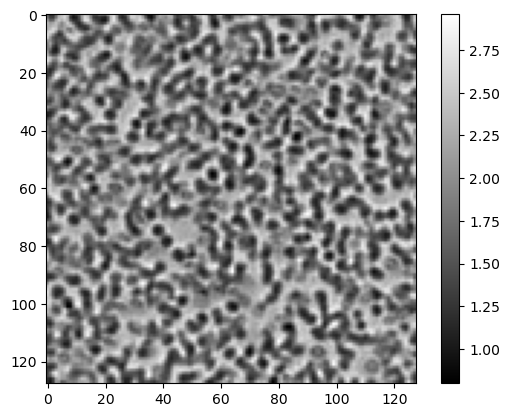

In [3]:
plt.imshow(bloodsmearStack[:, :, 0], cmap="gray")
plt.colorbar()

2.9631593


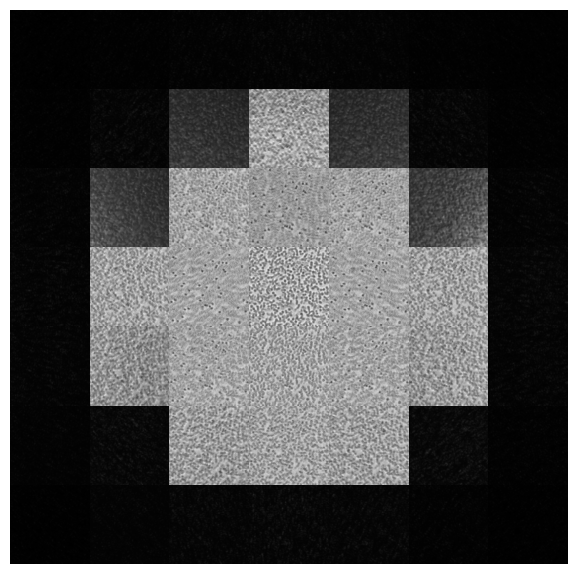

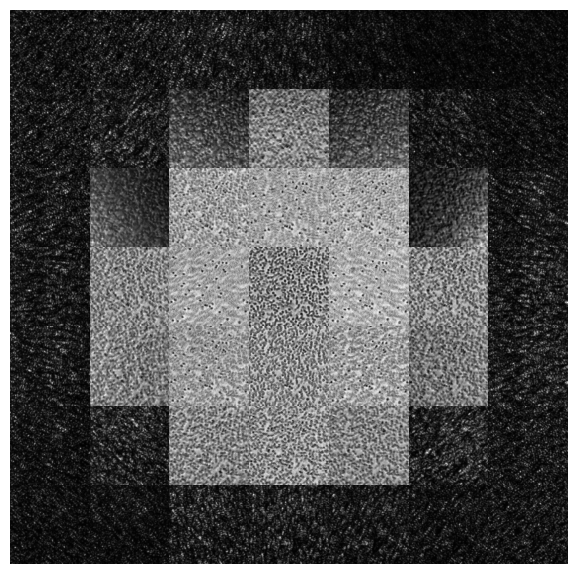

In [6]:
plot_dataset_spiral(bloodsmearStack, 7, bitDepth="float")
plot_dataset_spiral(bloodsmearStack, 7, bitDepth="scale")

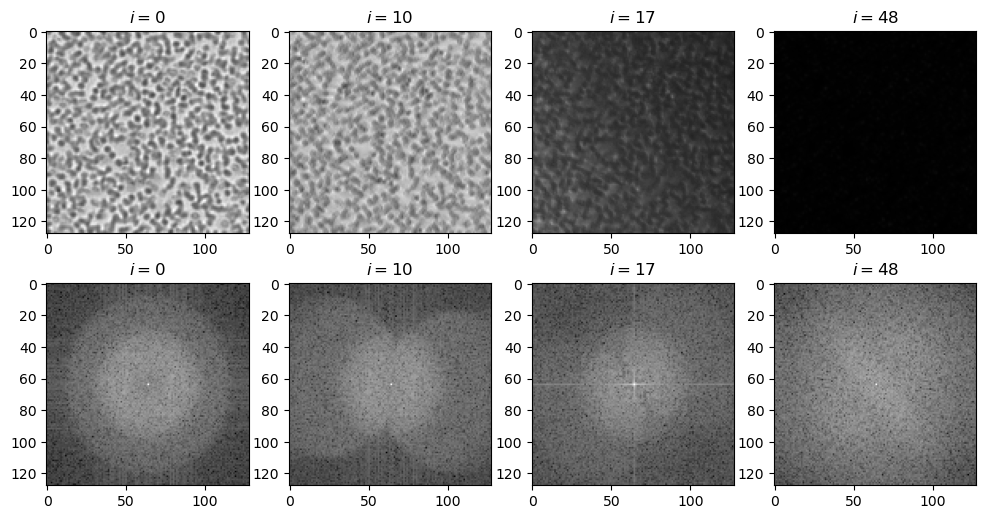

In [11]:
ids = [0, 10, 17, 48]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, n in enumerate(ids):
    axs[0, i].imshow(bloodsmearStack[:, :, n], cmap="gray", vmin=0, vmax=2.96)
    axs[0, i].set_title(f"$i={n}$")

    axs[1, i].imshow(np.log(abs(fftshift(fft2(bloodsmearStack[:, :, n])))), cmap="gray")
    axs[1, i].set_title(f"$i={n}$")